In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import math
import seaborn as sns
from copy import copy
from random import shuffle
import string
print("Setup Complete")

Setup Complete


In [2]:
class LCG:
    def __init__(self, seed, m, a, c):
        self.seed = seed
        self.sequence = []
        self.m = m
        self.a = a
        self.c = c

    def rand(self, n):
        self.sequence = []
        previous = self.seed
        for i in range(n):
            current = (previous * self.a + self.c) % self.m
            previous = current
            self.sequence.append(current / self.m)
#             previous = self.sequence[-1]
        return self.sequence

all:  110 unique:  100


<Axes: >

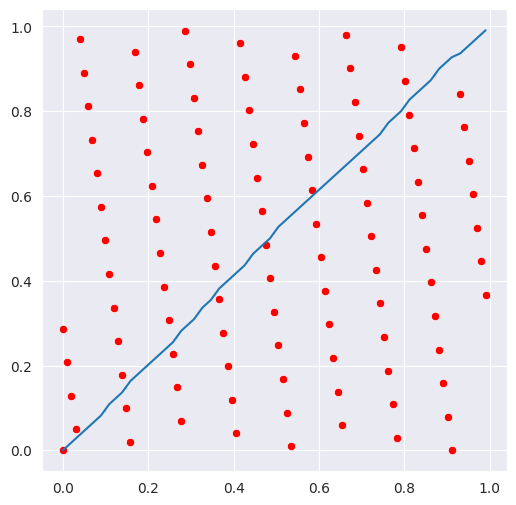

In [3]:
sns.set_style("darkgrid")

lcg1 = LCG(37, 101, 93, 29)
sequence = lcg1.rand(110)

print("all: ", len(sequence), "unique: ", len(set(sequence)))

x = [0] * len(sequence)
y = [0] * len(sequence)

for i in range(len(sequence) - 1):
    x[i] = sequence[i]
    y[i] = sequence[i + 1]
    
plt.figure(figsize=(6, 6))
sns.scatterplot(x=x, y=y, color='r')
sns.lineplot(x=sorted(sequence), y=[i / 110 for i in range(110)])

1196928 2393856
50.0


<Axes: >

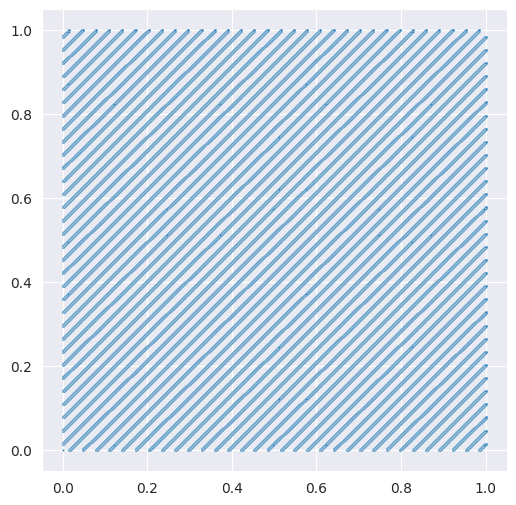

In [4]:
modulo = 1039 * 18 * 2 ** 7
lcg2 = LCG(29791, modulo, 37405, 2)
sequence = lcg2.rand(2 * 1039 * 18 * 2 ** 7)

seq_unique = len(set(sequence))
print(seq_unique, modulo)
print(round(seq_unique / modulo * 100, 4))

x = [0] * len(sequence)
y = [0] * len(sequence)

for i in range(len(sequence) - 1):
    x[i] = sequence[i]
    y[i] = sequence[i + 1]
    

plt.figure(figsize=(6, 6))
sns.scatterplot(x=x, y=y, s=2)

In [5]:
class MLM:
    def __init__(self, gen1, gen2, k):
        self.gen1 = gen1
        self.gen2 = gen2
        self.v = gen1.rand(k)

    def rand(self, n):
        print("!>", len(self.v))
        x = self.gen1.rand(n)
        y = self.gen2.rand(n)
#         print("!>", len(x))
#         print("!>", len(y))
        a = []
        for t in range(n - len(self.v)):
            index = math.floor(y[t] * len(self.v))
            a.append(self.v[index])
            self.v[index] = x[t + len(self.v)]
        return a


!> 64
!> 4787712
!> 4787712
2393856 1196928


<Axes: >

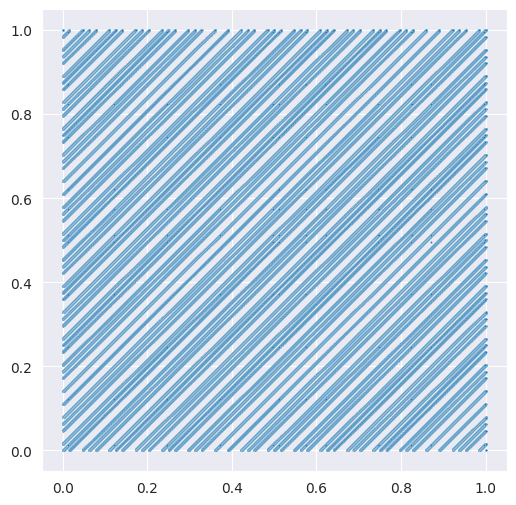

In [6]:
# new_lcg1 = LCG(8199, 2 ** 32, 22695477, 1)
# new_lcg2 = LCG(1001, 2 ** 32, 214013, 2531011)

mlm = MLM(lcg2, lcg1, 64)
mlm_seq = mlm.rand(modulo * 2)

print(modulo, len(set(mlm_seq)))

plt.figure(figsize=(6, 6))
sns.scatterplot(x=mlm_seq[::2], y=mlm_seq[1::2], s=2)

In [7]:
class LFSR:
    def __init__(self, initial, polinom):
        self.initial = initial
        self.state = int(initial, 2)
        self.polinom = polinom
        self.state_buffer = []

    def next_bit(self):
        state = self.state
        newbit = state ^ (state >> self.polinom[0])
       
        for x in self.polinom[1:]:
            newbit ^= (state >> x)
        newbit = newbit & 1
        bit = state & 1
        
        self.state_buffer.append(copy(state))
        state = (state >> 1) | (newbit << len(self.initial) - 1)
        self.state = state
        return bit

    def generate(self, n):
        self.state = int(self.initial, 2)
        result = []
        for i in range(n):
            result.append(self.next_bit())
        return result

    def get_states(self):
        return self.state_buffer

<Axes: >

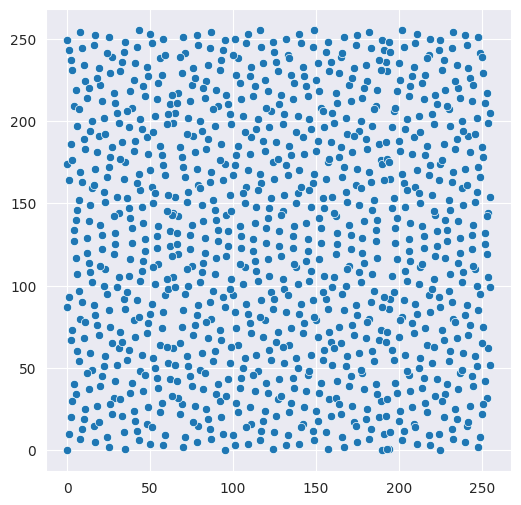

In [8]:
lfsr1 = LFSR("1110001001", [8, 5, 1][::-1])
gamma = ''.join(map(str, lfsr1.generate(2**15 + 1)))
lfsr1_seq = lfsr1.get_states()

nums = [int(gamma[i: i + 8], 2) for i in list(range(len(gamma))[::8])]
x = [0] * len(nums)
y = [0] * len(nums)

for i in range(len(nums) - 1):
    x[i] = nums[i]
    y[i] = nums[i + 1]
    
plt.figure(figsize=(6, 6))
sns.scatterplot(x=x, y=y)

<Axes: >

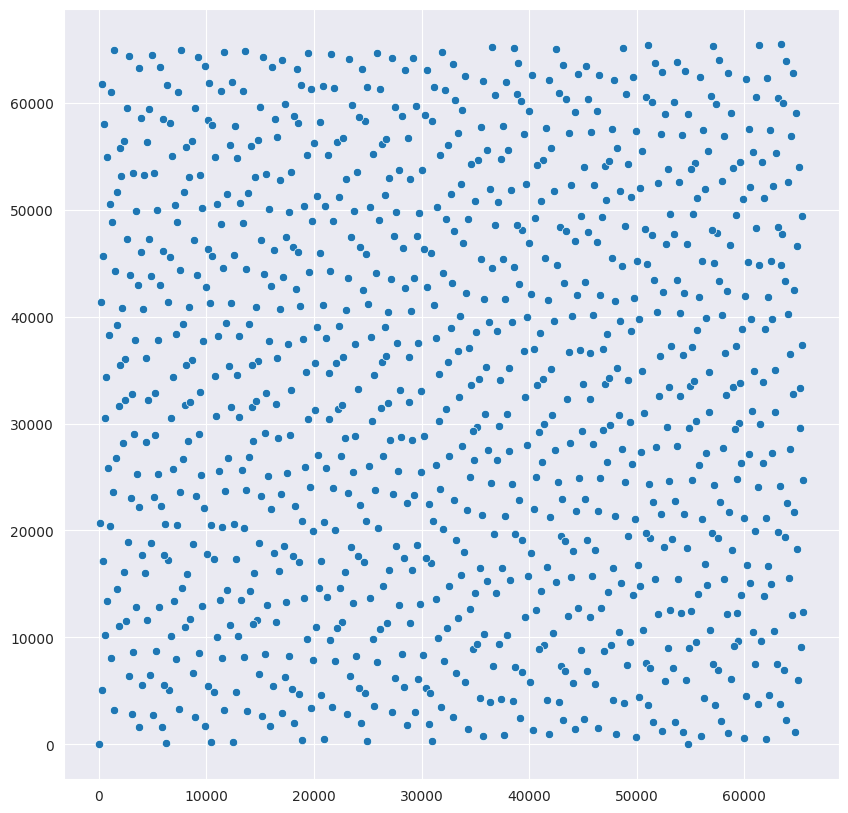

In [9]:
nums = [int(gamma[i: i + 16], 2) for i in list(range(len(gamma))[::16])]
x = [0] * len(nums)
y = [0] * len(nums)

for i in range(len(nums) - 1):
    x[i] = nums[i]
    y[i] = nums[i + 1]
    
plt.figure(figsize=(10, 10))
sns.scatterplot(x=x, y=y)

all: 4097
unique: 32


<Axes: >

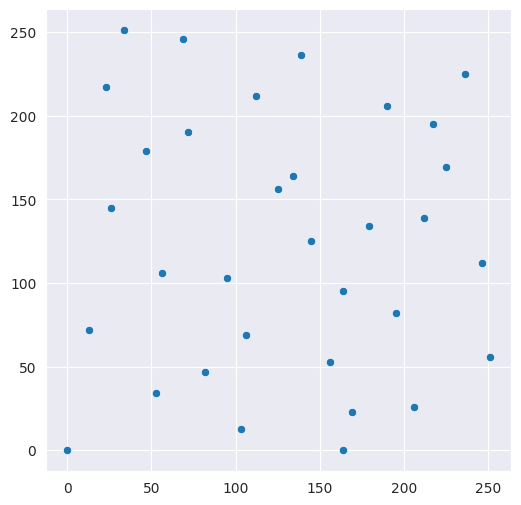

In [18]:
state = [117, 95, 116, 143, 179]
tap = [4, 2, 1, 0]

lfsr2 = LFSR("10100", [4, 3, 1])
gamma = ''.join(map(str, lfsr2.generate(2**15 + 1)))
    
nums = [int(gamma[i: i + 8], 2) for i in list(range(len(gamma))[::8])]

print("all:", len(nums))
print ("unique:", len(set(nums)))

x = [0] * len(nums)
y = [0] * len(nums)

for i in range(len(nums) - 1):
    x[i] = nums[i]
    y[i] = nums[i + 1]
    
plt.figure(figsize=(6, 6))
sns.scatterplot(x=x, y=y)

In [11]:
class SPRNG:
    def __init__(self, lfsr1, lfsr2):
        self.lfsr1 = lfsr1
        self.lfsr2 = lfsr2
    
    def generate(self, n):
        seq = []
        for i in range(n):
            bit1 = self.lfsr1.next_bit()
            bit2 = self.lfsr2.next_bit()
            if bit1 == 1:
                seq.append(bit2)
            else: 
                continue
        return seq;
            

8457 256


<Axes: >

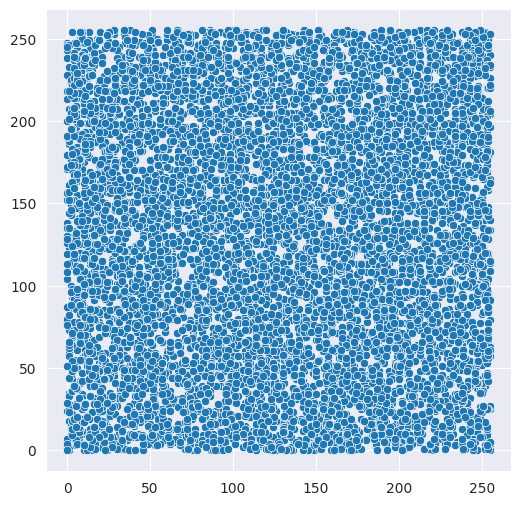

In [14]:
gen1 = LFSR("1101000000001000", [15, 13, 4][::-1])
gen2 = LFSR("10100", [4, 3, 1][::-1])
sprng = SPRNG(gen2, gen1)
sprng_seq = ''.join(map(str, sprng.generate(2**17)))

temp = [int(sprng_seq[i: i + 8], 2) for i in list(range(len(sprng_seq))[::8])]

print(len(temp), len(set(temp)))
                         
x = [0] * len(temp)
y = [0] * len(temp)

for i in range(len(temp) - 1):
    x[i] = temp[i]
    y[i] = temp[i + 1]

plt.figure(figsize=(6, 6))
sns.scatterplot(x=x, y=y)